In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Estatísticas descritivas

In [20]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.000,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.000,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.371000e+00,9.300000e-01,0.000,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.115000e+00,7.700000e-01,0.000,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184410e+02,290.000,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.000,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494000e+00,5.400000e-01,1.000,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,8.000000e-03,8.700000e-02,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.340000e-01,7.660000e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409000e+00,6.510000e-01,1.000,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:>

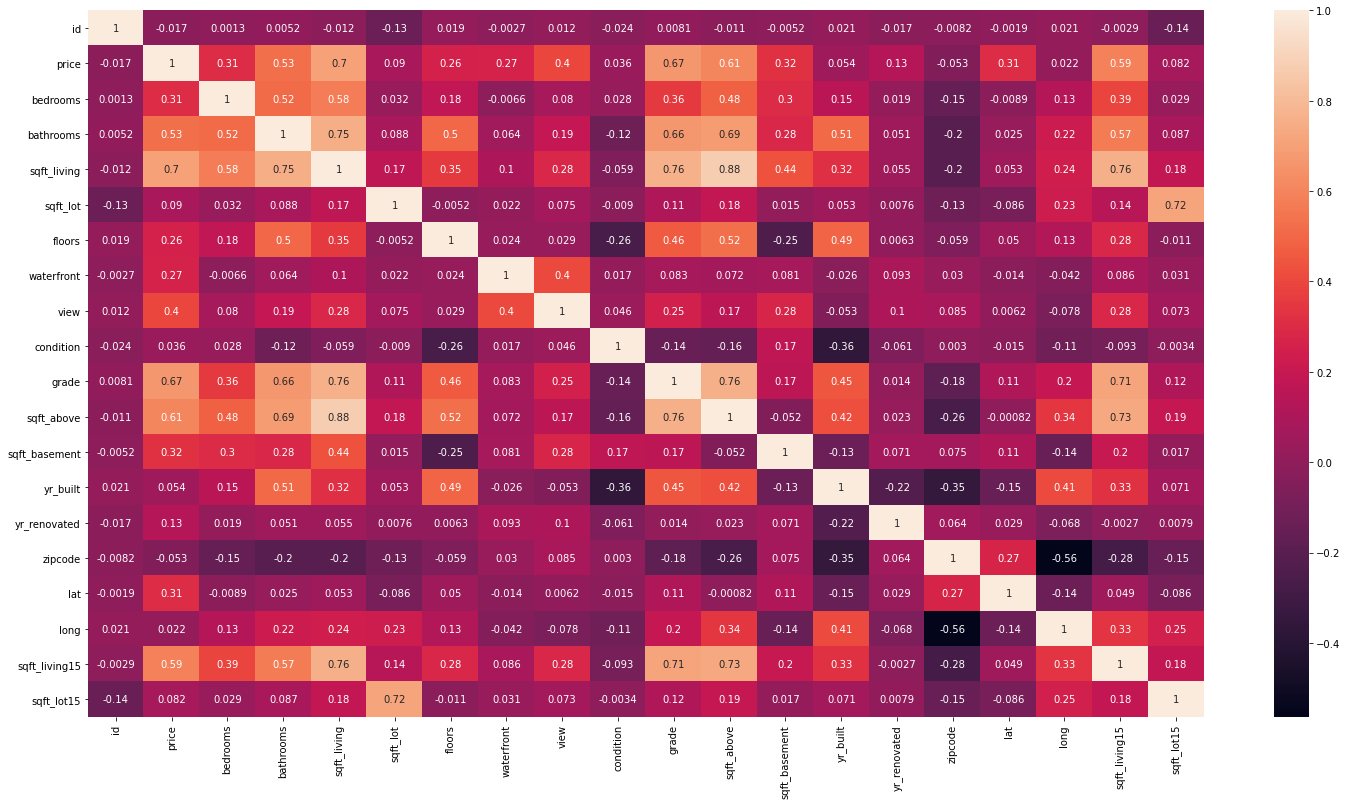

In [34]:
# vendo a correlação das variaveis
plt.figure(figsize = (25,13))
sns.heatmap(df.corr(),  annot=True)

In [54]:
df.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

<AxesSubplot:xlabel='long', ylabel='lat'>

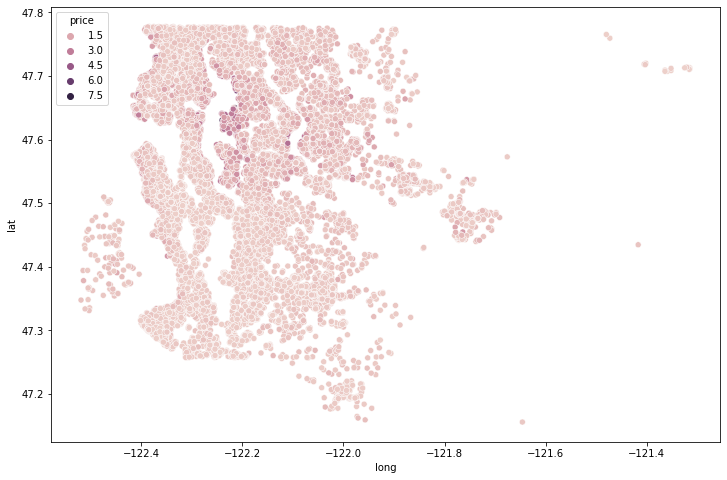

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

### Limpeza de dados

{'whiskers': [<matplotlib.lines.Line2D at 0x20c5e755580>,
 'caps': [<matplotlib.lines.Line2D at 0x20c5e755c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c5e755220>],
 'medians': [<matplotlib.lines.Line2D at 0x20c5e75f340>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c5e75fa00>],
 'means': [<matplotlib.lines.Line2D at 0x20c5e75f6a0>]}

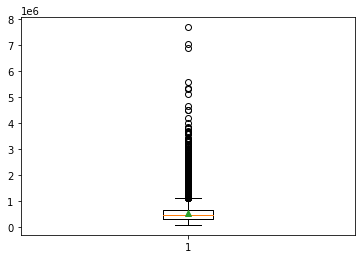

In [49]:
#sns.boxplot(x='bedrooms',y='price',data=df);
plt.boxplot(df['price'],showmeans=True)

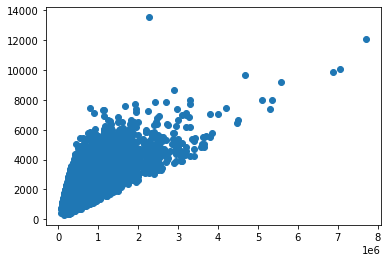

In [53]:
plt.scatter(df['price'],df['sqft_living'])